In [1]:
import sys
sys.path.append(sys.path[0].replace('/Development Notebooks',''))
from group_decomposition import fragfunctions as ff
from group_decomposition.utils import mol_from_molfile, set_scaffold_params, get_scaffold_vertices, find_smallest_rings, xyz_from_cml
import rdkit
from rdkit import Chem, rdBase
from rdkit.Chem import BRICS
from rdkit.Chem import AllChem #used for 3d coordinates
from rdkit.Chem import Draw,rdDepictor
from rdkit.Chem.Draw import IPythonConsole, rdMolDraw2D
from rdkit.Chem.Scaffolds import rdScaffoldNetwork # scaffolding
from rdkit import RDPaths
from rdkit.Chem.Draw import rdMolDraw2D
import numpy as np
from group_decomposition import utils


CPU times: user 49.5 ms, sys: 5.2 ms, total: 54.7 ms
Wall time: 54.6 ms


[13:32:22] Running LargestFragmentChooser
[13:32:22] Fragment: [C:1]([c:2]1[c:3]([H:32])[c:4]([H:33])[c:5]([C:28]([H:46])([H:47])[H:48])[c:6]([N:8]([C:9](=[O:10])[C:11]([N:12]2[C:13](=[O:14])[C@@:15]([C:19]([H:39])([H:40])[H:41])([c:20]3[c:21]([H:42])[c:22]([H:43])[c:23]([C:26]#[N:27])[c:24]([H:44])[c:25]3[H:45])[N:16]([H:38])[C:17]2=[O:18])([H:36])[H:37])[H:35])[c:7]1[H:34])([H:29])([H:30])[H:31]
[13:32:22] New largest fragment: [C:1]([c:2]1[c:3]([H:32])[c:4]([H:33])[c:5]([C:28]([H:46])([H:47])[H:48])[c:6]([N:8]([C:9](=[O:10])[C:11]([N:12]2[C:13](=[O:14])[C@@:15]([C:19]([H:39])([H:40])[H:41])([c:20]3[c:21]([H:42])[c:22]([H:43])[c:23]([C:26]#[N:27])[c:24]([H:44])[c:25]3[H:45])[N:16]([H:38])[C:17]2=[O:18])([H:36])[H:37])[H:35])[c:7]1[H:34])([H:29])([H:30])[H:31] (48)


,Smiles,Molecule,numAttachments,Atoms,xyz,Labels,atom_types
0,[2*]C(=O)N[3*],,2,"[9, 8, 10, 35]","[[1.9468679815, -0.1096531685, 0.5482125474], ...","[C, N, O, H]","[(C, 32, 3), (N, 19, 3), (O, 4, 1), (H, 5, 1)]"
1,[7*]C#N,,1,"[26, 27]","[[-7.5892175759, -1.0842080976, -0.4233090154]...","[C, N]","[(C, 14, 2), (N, 4, 1)]"
2,[2*]C[4*],,2,"[11, 36, 37]","[[0.7894540784, -0.6694717061, 1.3797296796], ...","[C, H, H]","[(C, 29, 4), (H, 4, 1), (H, 4, 1)]"
3,[1*]c1ccc([2*])c([3*])c1,,3,"[2, 3, 4, 5, 6, 7, 32, 33, 34]","[[5.9681947834, 1.1299306517, -0.7464804937], ...","[C, C, C, C, C, C, H, H, H]","[(C, 24, 3), (C, 19, 3), (C, 19, 3), (C, 24, 3..."
4,[4*]N1C(=O)N[C@]([5*])([6*])C1=O,,3,"[12, 13, 14, 15, 16, 17, 18, 38]","[[-0.4386326968, -0.0139950117, 1.0365203185],...","[N, C, O, C, N, C, O, H]","[(N, 24, 3), (C, 32, 3), (O, 4, 1), (C, 44, 4)..."
5,[6*]c1ccc([7*])cc1,,2,"[20, 21, 22, 23, 24, 25, 42, 43, 44, 45]","[[-3.5967751015, 0.3077302347, -0.3127842213],...","[C, C, C, C, C, C, H, H, H, H]","[(C, 24, 3), (C, 19, 3), (C, 19, 3), (C, 24, 3..."
6,[2*]C,,1,"[28, 46, 47, 48]","[[4.9471607037, -2.8791008972, 0.5208602322], ...","[C, H, H, H]","[(C, 10, 4), (H, 4, 1), (H, 4, 1), (H, 4, 1)]"
7,[5*]C,,1,"[19, 39, 40, 41]","[[-1.8018445547, 1.543861515, -1.6194984821], ...","[C, H, H, H]","[(C, 10, 4), (H, 4, 1), (H, 4, 1), (H, 4, 1)]"
8,[1*]C,,1,"[1, 29, 30, 31]","[[6.3029036612, 2.529091976, -1.2083943192], [...","[C, H, H, H]","[(C, 10, 4), (H, 4, 1), (H, 4, 1), (H, 4, 1)]"

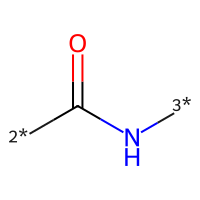
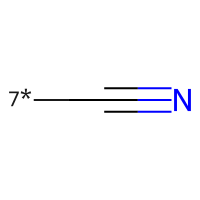
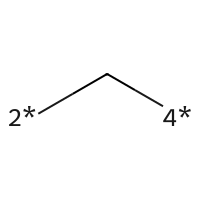
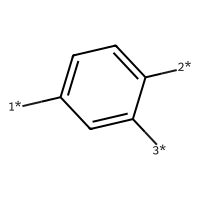
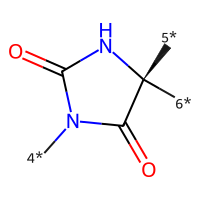
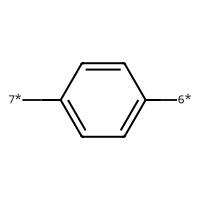
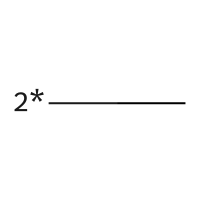
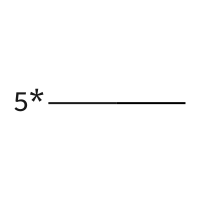
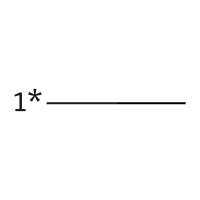

In [4]:
%time frag_frame = ff.identify_connected_fragments('mol.txt',input_type='molfile',cml_file='cml.txt')
frag_frame

CPU times: user 7.25 ms, sys: 591 µs, total: 7.85 ms
Wall time: 7.52 ms


,Smiles,xyz,Atoms,Labels,Molecule,count,numAttachments
0,*NC(*)=O,"[[1.9468679815, -0.1096531685, 0.5482125474], ...","[9, 8, 10, 35]","[C, N, O, H]",,1,2
1,*C#N,"[[-7.5892175759, -1.0842080976, -0.4233090154]...","[26, 27]","[C, N]",,1,1
2,*c1ccc(*)c(*)c1,"[[5.9681947834, 1.1299306517, -0.7464804937], ...","[2, 3, 4, 5, 6, 7, 32, 33, 34]","[C, C, C, C, C, C, H, H, H]",,1,3
3,*N1C(=O)NC(*)(*)C1=O,"[[-0.4386326968, -0.0139950117, 1.0365203185],...","[12, 13, 14, 15, 16, 17, 18, 38]","[N, C, O, C, N, C, O, H]",,1,3
4,*c1ccc(*)cc1,"[[-3.5967751015, 0.3077302347, -0.3127842213],...","[20, 21, 22, 23, 24, 25, 42, 43, 44, 45]","[C, C, C, C, C, C, H, H, H, H]",,1,2
5,*C,"[[4.9471607037, -2.8791008972, 0.5208602322], ...","[28, 46, 47, 48]","[C, H, H, H]",,3,1
6,*C*,"[[0.7894540784, -0.6694717061, 1.3797296796], ...","[11, 36, 37]","[C, H, H]",,1,2

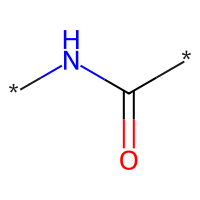
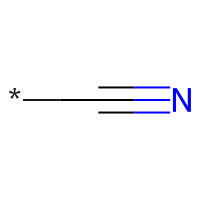
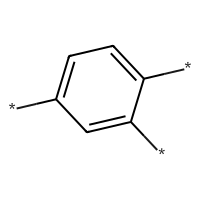
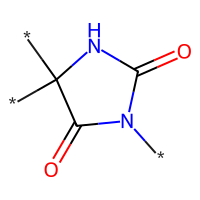
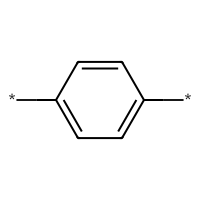
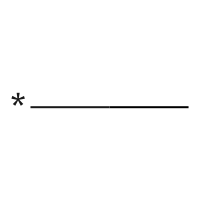
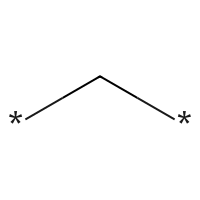

In [3]:
%time ff.count_uniques(frag_frame)